    v1.1 2018/10/23 JLC Ajout image architecture réseau + correction fautes de frappe
    v1.2 2019/06/13 BA  MAJ par Benjamin AILLOUD (stage L2 informatique)
    v2.0 2019/06/16 JLC Reformulation version 2.

# Machine learning : les module Python Keras & tensorflow
# Conception / entraînement / utilisation d'un réseau de neurones dédié à la reconnaissance de chiffres manuscrits.

# Les réseaux de neurones artificiels

### Le neurone artificiel
C'est une unité de traitement informatique programmé pour calculer la valeur de sa **fonction d'activation** en un point défini par la **combinaison linéaire de ses entrées** $\Sigma_i w_i x_i - b$ :

<img src="./figures/nn_1.png" width=600 >

### Fonction d'activation
Les principaux rôles des fonctions d'activation des neurones artificiels sont :
- donner au neurone artificiel un comportement **non linéaire** (avec par exemple des mécanismes de seuil, de saturation...)
- fixer la plage de sortie de la valeur calculée par le neurone (par exemple sortie dans l'intervalle $[-1 ; 1]$, ou $[0 ; +\infty[$

Exmples de fonction d'activation couramment utilisées :<br />
<img src="./figures/activationFunctions.png">

### Banques d'images MNIST

Dans ce travail, nous utiliserons les images de la banque d'images MNIST disponible sur Internet (http://yann.lecun.com/exdb/mnist/).

La banque MNIST propose des images en ton de gris de 28 $\times$ 28 pixels (soit des matrice de 28 $\times$ 28 d'entiers compris entre 0 et 255) qui seront mises sous la forme de vecteurs de 784 nombres `float` compris entre 0 et 1, pour constituer les entrées du réseau de neurones.

### Structure du réseau à construire 
Dans un premier temps on va construire un simple *réseau dense*, avec :
- une couche d'entrée de 784 valeurs comprises entre 0 et 1 (les pixels de l'image 28 $\times$ 28 mis sous forme de vecteur),
- une couche caché de 784 neurones utilisant la fonction d'activation `relu`,
- une couche de sortie à 10 neurones, pour la classification des images en 10 classes {0,1,2...9}, utilisant la fonction d'activation `softmax`, adaptée au traitement de classification.

<img src="./figures/archiReseau.png" width=850>

La fonction d'activation `softmax` utilisée pour les 10 neurones de la couche de sortie permet de "faire ressortir" la sortie $y_i$ de valeur la plus grande : `softmax` sera très proche de 1 pour le neurone fournissant la plus grande valeur $y_i$, alors que pour tous les autres neurones, la valeur  de `softmax` sera proche de zero.

<img src="./figures/softmax2.png" width=300>

# Prérequis

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image

### Installation des paquets Python :
Dans une console de commande ("*fenêtre prompt Anaconda*" pour Windows, ou "*terminal*" pour Mac OS X ou GNU/Linux), taper la commande :

    conda install keras
    
Importer le module `keras`et vérifier sa version (doit être 2.x.y) :    

In [2]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

La documentation du module Python Keras (en anglais) est disponible sur https://keras.io.

# Travail à faire

# 1/ Récupération du jeu de données MNIST :

https://fr.wikipedia.org/wiki/Base_de_données_MNIST : La base de données MNIST (*Mixed National Institute of Standards and Technology*), est une base de données de chiffres écrits à la main. C'est un jeu de données très utilisé en apprentissage automatique.<br /><br />
L'ensemble des images du jeu de données MNIST contient **60000 images d'apprentissage** et **10000 images de test**, soit en tout **70000 images** de 28 x 28 pixels.

In [3]:
# Load data from https://www.openml.org/d/554
from keras.datasets import mnist
(image_train, etiq_train), (image_test, etiq_test) = mnist.load_data() 

<span style="color:blue;font-family:arial">Faire afficher le type des objets `image_train`, `etiq_train`, `image_test` et `etiq_test` :</span>

In [4]:
objs = (image_train, etiq_train, image_test, etiq_test)
for o in objs: print(type(o))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


<span style="color:blue;font-family:arial">Faire afficher l'attribut `shape` des tableaux `image_train`, `etiq_train`, `image_test` et `etiq_test` -> interpréter les réponses :</span>

In [5]:
for o in objs: print(o.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


<span style="color:blue;font-family:arial">Faire afficher le type des tableaux `image_train`, `etiq_train`, `image_test` et `etiq_test` -> interpréter les réponses :</span>

In [6]:
for o in objs: print(o.dtype)

uint8
uint8
uint8
uint8


## 1.1/ Vérification des étiquettes des données : 

<span style="color:blue;font-family:arial">Faire afficher les 10 premières valeurs de `etiq_train` et `etiq_test` ; interpréter les réponses. </span>

In [7]:
print(etiq_train[:10])

[5 0 4 1 9 2 1 3 1 4]


In [8]:
print(etiq_test[:10])

[7 2 1 0 4 1 4 9 5 9]


## 1.2/ Visualisation des images  :

<span style="color:blue;font-family:arial;">Avec la fonction `imshow` du module matplotlib.pyplot faire afficher l'image de rang 600 dans le tableau `image_train`.<br />
Indications :<br />
- utiliser `plt.figure(figsize=(5,5))`;<br />
- passer l'argument `cmap='binary'` à la fonction `imshow`;<br/>
- enlever les graduations en X et Y avec l'instruction  `plt.xticks([]); plt.yticks([])`.</span>

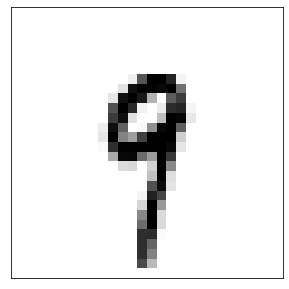

In [9]:
plt.figure(figsize=(5,5))
import matplotlib.pyplot as plt
plt.imshow(image_train[600],cmap='binary')
plt.xticks([]) ; plt.yticks([]);

<span style="color:blue;font-family:arial">Vérifier que l'étiquette associée à `image_train[600]` est bien `9` :</span>

In [10]:
etiq_train[600]

9

<span style="color:blue;font-family:arial">Écrire une fonction `plotImage` qui prend les arguments qui vont bien pour afficher les images MNIST commençant au rang `r` sur `L` lignes et `C` colonnes (utiliser `plt.subplot`). La figure affichée doit avoir pour dimensions 10 x 10 pouces.

In [11]:
def plot_image(r,L,C):
    plt.figure(figsize=(10,10))
    for i in range(L*C):
        plt.subplot(L, C, i+1)
        plt.imshow(image_train[r+i],cmap='binary')
        plt.xticks([])
        plt.yticks([])


<span style="color:blue;font-family:arial">Fait afficher 100 images à partir de la 600 ème dans une grille de 10x10 : </span>

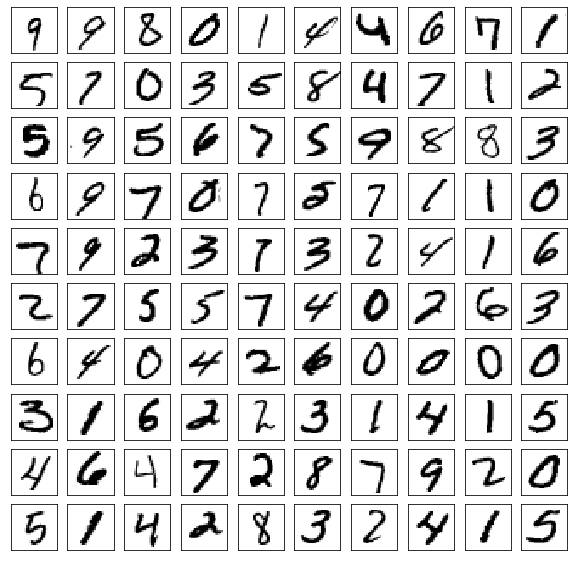

In [12]:
plot_image(600, 10, 10)

# 2/ Pré-traitement des données

**Le pré-traitement des données constitue une des étapes fondamentales de l'apprentissage des réseaux de neurones.**

Pour adapter les données au réseau de neurones, on doit transformer les matrice d'entiers `uint8` représentant les images 24 x 24 pixels en vecteurs **normalisés** $(V_i)_{i=0..783}$ de 784 valeurs réelles $V_i$  avec $ 0 \leqslant V_i \leqslant 1.$

## 2.1/ Transformation des matrices d'entrée en vecteurs normalisés :

In [13]:
nb_image_train, nb_image_test = image_train.shape[0], image_test.shape[0]
nb_pixels = image_train.shape[1] * image_train.shape[2]   # 28 x 28 = 784 pixels

# mise 'à plat' des matrices sous forme de vecteurs de floats 
# Indications: utiliser les méthodes 'reshape(new_shape)' et astype('float32') de ndarray).
x_train = image_train.reshape((nb_image_train, nb_pixels)).astype('float32')
x_test  = image_test.reshape((nb_image_test, nb_pixels)).astype('float32')

# normalisation des tableaux X_train et X_test :
x_train = x_train/255
x_test  = x_test/255

<span style="color:blue;font-family:arial">Vérifier la tailles des tableaux `x_train` et `x_test`  :</span>

In [14]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

## 2.2/ 'Hot coding' des étiquettes :

Les étiquettes des images sont des valeurs entières comprises entre 0 et 9. Pour traiter efficacement le problème de classification, on utilise la technique de `hot encoding` qui remplace les valeurs des différentes classes par un vecteur de données comportant autant d'éléments que de classes.<br />
Par exemple :
- l'étiquette `0` sera transformée en la vecteur `[1 0 0 0 0 0 0 0 0 0]`.
- l'étiquette `3` sera transformée en la vecteur `[0 0 0 1 0 0 0 0 0 0]`.

Pour réaliser le codage des étiquettes, oela on utilise la fonction `to_categorical` du module `keras.utils.np_utils` :

In [15]:
from keras.utils.np_utils import to_categorical
# 'hot encoding' des sorties :
y_train = to_categorical(etiq_train)
y_test  = to_categorical(etiq_test)

<span style="color:blue;font-family:arial">Faire afficher les 10 premières valeurs de `etiq_train` et les 10 premières valeurs `hot encoded` de `y_train` :</span>

In [16]:
etiq_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [17]:
y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [18]:
len(y_train[0])

10

# 3/ Construction du réseau de neurones :

On va maintenant construire un réseau de neurone s**équentiel** (cf https://keras.io/models/sequential ) en **4 lignes** à l'aide du module **keras** qui permet une manipulation *high level* des outils proposés par le module Python **tensorflow**.<br />

Les spécifications du réseau de neurones à construire sont :
- les entrées sont constituées des 784 pixels, mis sous forme d'un vecteur normalisé ;
- le réseau de neurones comporte une couche de 784 neurones utilisant la fonction d'activation `relu` (*retified linear unit*, voir https://keras.io/activations) ;
- la couche de sortie comporte 10 neurones utilisant la fonction d'activation `softmax` pour convertir les sorties en valeur de probalibilités permettant de choisir une des 10 classes ;
- la fonction d'erreur (différence entre étiquette et valeur prédite par le réseau) est `Logarithmic loss` (dans Keras elle coorepnd à la *loss function* `categorical_crossentropy`) ;
- l'algorithme de descente de gradient ADAM est utilisé pour l'optimisation des poids des neurones par rétro-progation de l'erreur. 

La **fonction d'erreur** (*loss function*) utilisée pour quantifier l'erreur entre l'étiquette associée aux données d'entrée est disponible dans keras sous le nom `categorical_crossentropy`:

<img src="./figures/CrossEntropy2.png" width=650>

In [19]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense 

nb_classes = len(y_train[0])

# les 4 lignes pour construire le réseau de neurones:
model = Sequential()
model.add(Dense(nb_pixels, input_dim=nb_pixels, kernel_initializer='normal', activation='relu'))
model.add(Dense(nb_classes, kernel_initializer='normal', activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


<span style="color:blue;font-family:arial">Avec la méthode `summary` de l'objet `model`, faire afficher la description du modèle : expliquer les valeurs des paramètres ?</span>

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [ ]:
784*785 + 10*785

# 4/ Entrainnement du réseau :

Le modèle est entraîné sur les $60\,000$ images,
- 10 fois de suite (paramètre `epochs`), 
- avec mises à jour des poids toutes les 200 images (paramètre `batch_size`),
en utilisant les données d'entrée `x_train` (images) et les données de sortie `y_train` (étiquettes) :

In [22]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200, verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.2763 - acc: 0.9222 - val_loss: 0.1409 - val_acc: 0.9585
Epoch 2/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.1110 - acc: 0.9681 - val_loss: 0.0933 - val_acc: 0.9708
Epoch 3/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.0709 - acc: 0.9799 - val_loss: 0.0769 - val_acc: 0.9772
Epoch 4/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.0485 - acc: 0.9863 - val_loss: 0.0664 - val_acc: 0.9802
Epoch 5/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.0353 - acc: 0.9902 - val_loss: 0.0655 - val_acc: 0.9788
Epoch 6/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0258 - acc: 0.9931 - val_loss: 0.0604 - val_acc: 0.9796
Epoch 7/10
60000/60000 [==============================] - 5s 84us/step - loss: 

### Tracé des courbes `accuracy` et `loss` :

In [23]:
def plot(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(15,5))
    ax1 = plt.subplot(1,2,1)
    ax1.plot(history.history['acc'], 'o-',label='Train')
    ax1.plot(history.history['val_acc'], 'o-', label='Test')
    ax1.set_title('Model accuracy')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch') 
    ax1.grid()
    ax1.legend(loc='best')
    # Plot training & validation loss values
    ax2 = plt.subplot(1,2,2)
    ax2.plot(history.history['loss'], 'o-', label='Train')
    ax2.plot(history.history['val_loss'], 'o-',  label='Test')
    ax2.set_title('Model loss')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend(loc='best')
    ax2.grid()
    plt.show()

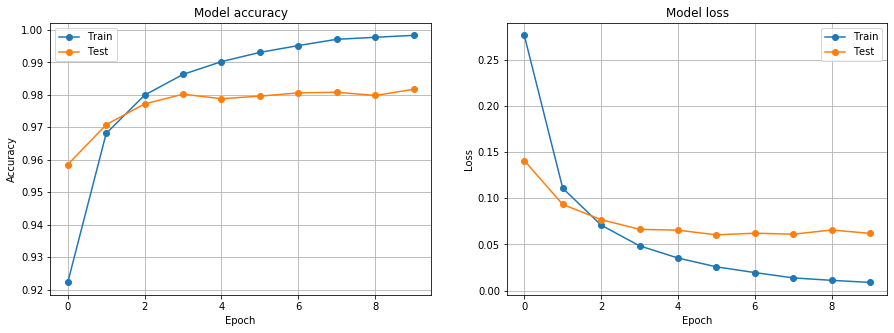

In [24]:
plot(history)

Entrainer le réseau plus longtemps (par augmentation du paramètre `epochs` peut permettre d'aumengenter les performances du réseau... mais les courbes de précision du test (*test accuracy*) restent asymptotiquement en-dessous des 98 %.


# 5/ Vérication de l'apprentissage avec le jeu de test

La méthode `predict`permet de demander au modèle sa prédiction pour une ou plusieurs entrées.<BR />
Exemple de prédition pour une image test numéro i dans le jeu d'images de test (0 <= i <= 10000) :

valeur trouvée par le réseau de neurones : [0.0000 0.0000 0.0000 0.0018 0.0000 0.0000 0.0000 0.0006 0.0000 0.9976]
valeur trouvée arrondie  : [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0]
rep[0].argmax() donne    : 9

La bonne réponse est 9, soit en 'hot coded' : [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0]


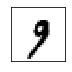

In [25]:
i = 1000
rep = model.predict(x_test[i:i+1])

np.set_printoptions(formatter={'float':'{:0.4f}'.format})
print("valeur trouvée par le réseau de neurones :", rep[0])

np.set_printoptions(formatter={'float':'{:0.1f}'.format})
print("valeur trouvée arrondie  : {}".format(rep[0]))
print("rep[0].argmax() donne    : {}".format(rep[0].argmax()))

plt.figure(figsize=(1,1))
digit = image_test[i]
plt.xticks([]); plt.yticks([])
plt.imshow(digit, cmap='binary');
print(f"\nLa bonne réponse est {etiq_test[i]}, soit en 'hot coded' : {y_test[i]}")

<span style="color:blue;font-family:arial">Écrire les instructions Python pour calculer avec les données de test le pourcentage d'erreur du réseau entrainé.... <br/> 
Conseil: la variable rep contient pour chaque image une liste de 10 probabilités, il pourra être utile d'utiliser la fonction argmax de la librairie numpy pour obtenir le chiffre de plus haute probabilité.</span>


In [26]:
results = model.predict_on_batch(x_test)
bonne_rep = 0
for i, res in enumerate(results):
    bonne_rep += (np.argmax(res) == etiq_test[i])
print(f"taux de réussite : {bonne_rep/len(x_test)*100 : .2f} %")

taux de réussite :  98.17 %


# 6/ Évolution du réseau : augmentation du nombre de couches cahées 

In [27]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense 

nb_classes = len(y_train[0])

model2 = Sequential()

model2.add(Dense(784, input_dim=nb_pixels, kernel_initializer='normal', activation='relu'))
model2.add(Dense(300, kernel_initializer='normal', activation='relu'))
model2.add(Dense(100, kernel_initializer='normal', activation='relu'))
model2.add(Dense(nb_classes, kernel_initializer='normal', activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

<span style="color:blue;font-family:arial">Avec la méthode `summary` de l'objet `model2`, faire afficher la description du modèle : expliquer les valeurs des paramètres ?</span>

In [28]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_4 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_5 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 882,050
Trainable params: 882,050
Non-trainable params: 0
_________________________________________________________________


In [29]:
history2 = model2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 137us/step - loss: 0.2894 - acc: 0.9156 - val_loss: 0.1192 - val_acc: 0.9615
Epoch 2/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.0955 - acc: 0.9704 - val_loss: 0.1136 - val_acc: 0.9647
Epoch 3/10
60000/60000 [==============================] - 9s 152us/step - loss: 0.0576 - acc: 0.9819 - val_loss: 0.0705 - val_acc: 0.9780
Epoch 4/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.0393 - acc: 0.9878 - val_loss: 0.0737 - val_acc: 0.9784
Epoch 5/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.0294 - acc: 0.9908 - val_loss: 0.0668 - val_acc: 0.9809
Epoch 6/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.0216 - acc: 0.9929 - val_loss: 0.0668 - val_acc: 0.9804
Epoch 7/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.0178 - acc: 0.9940 - val_loss: 0.0816 - 

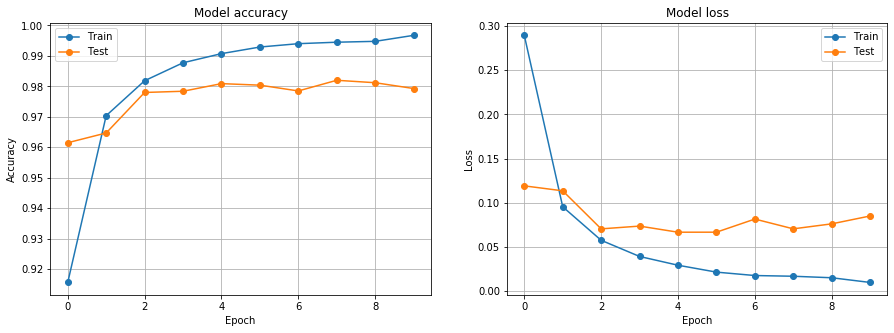

In [30]:
plot(history2)

<span style="color:blue;font-family:arial"> Augmenter le nombre de couches a t'il un impact sur les performances du réseau (> 98.5%) ? Que peut on conclure sur l'utilité de complexifier ce type de réseau ? </span>

À priori, on peut voir que cela n'a pas un grand impact, la reconnaissance lors des tests tourne toujours autour des 98%, il semble donc peu utile de complexifier ce type de réseau...

# 7/ Utiliser le réseau avec ses propres images

On va utiliser le réseau entrainé pour voir comment il réagi avec des chiffres "écrits à la main" (ou à la souris...) très différents des chiffres de la banque MNIST...

In [42]:
import os
images = ['chiffres/'+f for f in os.listdir('chiffres') if f.endswith(".png") or f.endswith(".jpg")]
print(f"Liste des images envoyées : {images}")

Liste des images envoyées : ["chiffres/ce n'est pas un deux.png", 'chiffres/septFrançais.png', 'chiffres/6jlc.png', 'chiffres/essa1.png', 'chiffres/cinq.png', 'chiffres/chaval de 3.png', 'chiffres/septAmericain.png']


### Option : lecture des fichiers image avec openCV

Si le module `openCV` n'est pas installé, il faut taper dans la "fenêtre prompt anaconda" (Windows) ou dans le "terminal" (Mac Os X ou GNU/Linux) :

    conda install -c anaconda openCV
    
Puis bien penser à faire un **kernel restart** ... et rejouer les cellules jusqu'ici.   

In [43]:
import cv2
# lecture des images -> matrices ndarray 28x28 
input_data = [255-cv2.cvtColor(cv2.imread(image),cv2.COLOR_BGR2GRAY) for image in images]
input_data = np.array(input_data)
input_data.shape, input_data.dtype  # on doit avoir 4 matrices de 28 x 28 valeurs 

((7, 28, 28), dtype('uint8'))

### Option : lecture des fichiers image avec scikit-image

Si l'installation du module openCV pose problème, on peut utiliser la fonction imread du module skimage.io :

    pip install scikit-image
    

In [46]:
from skimage.io import imread
input_data = [255-imread(image, as_gray=True) for image in images]
input_data = np.array(input_data)
input_data.shape, input_data.dtype 

((7, 28, 28), dtype('float64'))

#### Visualistion des images :

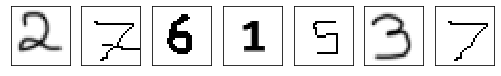

In [47]:
plt.figure(figsize=(15,4))
for i,M in enumerate(input_data):  
    plt.subplot(1,12,i+1)
    plt.imshow(input_data[i], cmap='binary');
    plt.xticks([]); plt.yticks([])

transformation des matrices 28x28 en vecteurs de float normalisés :

In [48]:
nb_images = input_data.shape[0]
# mise 'à plat' des matrices sous forme de vecteurs de floats :
x_photo = input_data.reshape(nb_images, 28*28).astype('float32')
# normalisation des données :
x_photo /= 255

prédiction du réseau entrainé, avec les images perso :

In [53]:
np.set_printoptions(formatter={'float': '{:0.3f}'.format})
rep = model.predict(x_photo)
print(rep)

[[0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000]
 [0.000 0.965 0.034 0.000 0.000 0.000 0.000 0.000 0.001 0.000]
 [0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000]]


In [50]:
[r.argmax() for r in rep]

[2, 5, 5, 1, 5, 3, 5]

In [54]:
rep = model2.predict(x_photo)
print(rep)

[[0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000]
 [0.000 0.995 0.004 0.000 0.000 0.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000]]


In [55]:
[r.argmax() for r in rep]

[2, 5, 5, 1, 5, 3, 5]

Le résultat n'est pas terrible : pour améliorer les performances du réseau il est nécessaire de changer d'architecture pour passer sur des réseaux de type **convolutionnel**, ce qui est l'objet du cahier IPython `TP_MNIS_Keras_convolutionnel.ipynb`.

# Conclusion

Si on essaye de rejouer plusieur fois de suite la création/entrainnement du réseau de neurones, on observe des résultats différents à chaque fois : à la création du réseau de neurones, les 623290 poids des neurones sont initialisés par tirages aléatoires...
Chaque re-tirage aléatoire fournit un jeu de 623290 nombres différents, d'où un réseau entrainné différent...

Pour obtenir un comportement **reproductible** sur plusieurs création/entrainnement ou sur plusieur machines, il faut configurer les générateurs de nombres aléatoires impliqués de façon à obtenir des suites aléatoires **reproductibles**.

Ceci s'obtient en fixant la **graine** (*seed*) des générateurs aléatoires....